In [178]:
!date

jue ene  2 20:03:23 CET 2020


In [179]:
# Active system's automagic
%automagic on


Automagic is ON, % prefix IS NOT needed for line magics.


In [180]:
# Load work environment

In [181]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/01_Original_data'

In [182]:
#folder = '/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'
folder = os.getcwd()
!ls {folder}

06a_maa_to_m2012.xlsx  09a_maa_to_m2015.xlsx  12a_maa_to_m2018.xlsx
06b_man_to_w2012.xlsx  09b_man_to_w2015.xlsx  12b_man_to_w2018.xlsx
07a_maa_to_m2013.xlsx  10a_maa_to_m2016.xlsx  13a_maa_to_m2019.xlsx
07b_man_to_w2013.xlsx  10b_man_to_w2016.xlsx  13b_man_to_w2019.xlsx
08a_maa_to_m2014.xlsx  11a_maa_to_m2017.xlsx
08b_man_to_w2014.xlsx  11b_man_to_w2017.xlsx


In [183]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/01_Original_data'

In [184]:
# Load library for work and analitics data
import pandas as pd
import numpy as np

In [185]:
!ls -ltr ../01_Original_data

total 18768
-rw-rw-r-- 1 dsc dsc 1290067 dic 26 15:18 06a_maa_to_m2012.xlsx
-rw-rw-r-- 1 dsc dsc 1403666 dic 26 15:20 06b_man_to_w2012.xlsx
-rw-rw-r-- 1 dsc dsc 1235276 dic 26 15:21 07a_maa_to_m2013.xlsx
-rw-rw-r-- 1 dsc dsc 1417179 dic 26 15:22 07b_man_to_w2013.xlsx
-rw-rw-r-- 1 dsc dsc  963040 dic 26 15:23 08a_maa_to_m2014.xlsx
-rw-rw-r-- 1 dsc dsc 1223346 dic 26 15:24 08b_man_to_w2014.xlsx
-rw-rw-r-- 1 dsc dsc  995042 dic 26 15:25 09a_maa_to_m2015.xlsx
-rw-rw-r-- 1 dsc dsc 1109618 dic 26 15:26 09b_man_to_w2015.xlsx
-rw-rw-r-- 1 dsc dsc 1027178 dic 26 15:27 10a_maa_to_m2016.xlsx
-rw-rw-r-- 1 dsc dsc 1173313 dic 26 15:28 10b_man_to_w2016.xlsx
-rw-rw-r-- 1 dsc dsc 1056650 dic 26 15:29 11a_maa_to_m2017.xlsx
-rw-rw-r-- 1 dsc dsc 1123358 dic 26 15:30 11b_man_to_w2017.xlsx
-rw-rw-r-- 1 dsc dsc 1149202 dic 26 15:32 12a_maa_to_m2018.xlsx
-rw-rw-r-- 1 dsc dsc 1261817 dic 26 15:33 12b_man_to_w2018.xlsx
-rw-rw-r-- 1 dsc dsc 1289344 dic 26 15:34 13a_maa_to_m2019.xlsx
-rw-rw-r-- 1 dsc dsc 1477248

In [186]:
# Read from excel files complete with column names stipulated and transform them
# (1) Imports:
import os
import glob

In [187]:
# (2) File list:
path = os.chdir(os.getcwd() + '/..' + '/01_Original_data')
!pwd

/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/01_Original_data


In [188]:
patron_files_xlsx = '*.xlsx'
# Avoid storing entries in memory simultaneously
files_xlsx = sorted(glob.glob(patron_files_xlsx, recursive=True)) 
files_xlsx

['06a_maa_to_m2012.xlsx',
 '06b_man_to_w2012.xlsx',
 '07a_maa_to_m2013.xlsx',
 '07b_man_to_w2013.xlsx',
 '08a_maa_to_m2014.xlsx',
 '08b_man_to_w2014.xlsx',
 '09a_maa_to_m2015.xlsx',
 '09b_man_to_w2015.xlsx',
 '10a_maa_to_m2016.xlsx',
 '10b_man_to_w2016.xlsx',
 '11a_maa_to_m2017.xlsx',
 '11b_man_to_w2017.xlsx',
 '12a_maa_to_m2018.xlsx',
 '12b_man_to_w2018.xlsx',
 '13a_maa_to_m2019.xlsx',
 '13b_man_to_w2019.xlsx']

In [189]:
# (3) Initialize empty dataframe:
df_from_xlsx_total = pd.DataFrame()

In [190]:
%%time
# (4) Loop over the file list to append to an empty dataframe:
for f in files_xlsx:
    df_from_xlsx_parcial = pd.read_excel(f,                          
                          index_col=None,
                          names=['ESTADO', 'CONDADO', 'ORGANIZACION', 'BORRAR'
                                 , 'TIPO_PLAN_GENERICO_MEDICARE', 'PRIMA_MENSUAL_CONSOLIDADA', 'BORRAR'
                                 , 'BORRAR', 'BORRAR'
                                 , 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR'
                                 , 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'])

    df_from_xlsx_total = df_from_xlsx_total.append(df_from_xlsx_parcial, sort=False)

CPU times: user 47.3 s, sys: 312 ms, total: 47.6 s
Wall time: 47.2 s


In [191]:
len(df_from_xlsx_total)

306183

In [192]:
df_from_xlsx_total.describe()

,BORRAR.6,BORRAR.7
count,306183.000000,306183.000000
mean,29.594083,0.241081
std,42.374874,1.416832
min,1.000000,0.000000
25%,4.000000,0.000000
50%,12.000000,0.000000
75%,33.000000,0.000000
max,278.000000,24.000000


In [193]:
df_from_xlsx_total.head()

,ESTADO,CONDADO,ORGANIZACION,BORRAR,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,BORRAR.1,BORRAR.2,BORRAR.3,BORRAR.4,BORRAR.5,BORRAR.6,BORRAR.7,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,AARP MedicareComplete Plan 1 (HMO),Local HMO,$0.00,$0,Enhanced,No Gap Coverage,EA,H0151,1,0,"$4,450",2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,Blue Advantage Complete (PPO),Local PPO,$99.00,$130,Basic,No Gap Coverage,BA,H0104,11,5,"$3,400",2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,Blue Advantage Premier (PPO),Local PPO,$199.00,$0,Enhanced,No Gap Coverage,EA,H0104,10,3,"$3,400",2.5
3,Alabama,Autauga,"Healthspring of Alabama, Inc.",HealthyAdvantage (HMO),Local HMO *,$0.00,NaN,NaN,NaN,NaN,H0150,12,0,"$3,400",3
4,Alabama,Autauga,"Healthspring of Alabama, Inc.",HealthyAdvantage Preferred (HMO),Local HMO,$0.00,$0,Enhanced,Many Generics,EA,H0150,1,0,"$3,400",3


In [194]:
df_from_xlsx_total.shape

(306183, 15)

In [195]:
df_from_xlsx_total.duplicated().sum()

589

In [196]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                             0
CONDADO                            0
ORGANIZACION                       0
BORRAR                             0
TIPO_PLAN_GENERICO_MEDICARE       32
PRIMA_MENSUAL_CONSOLIDADA       2511
BORRAR.1                       79392
BORRAR.2                       79392
BORRAR.3                       79392
BORRAR.4                       79392
BORRAR.5                           0
BORRAR.6                           0
BORRAR.7                           0
DESEMBOLSO_MAXIMO               3389
CLASIFICACION                     32
dtype: int64

In [197]:
# Delete surplus columns that start with:
filtro_borrar = [col for col in df_from_xlsx_total if col.startswith('BORRAR')]
df_from_xlsx_total = df_from_xlsx_total.drop(columns=filtro_borrar)

In [198]:
df_from_xlsx_total.shape

(306183, 7)

In [199]:
df_from_xlsx_total.head(20)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,Local HMO,$0.00,"$4,450",2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,Local PPO,$99.00,"$3,400",2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,Local PPO,$199.00,"$3,400",2.5
3,Alabama,Autauga,"Healthspring of Alabama, Inc.",Local HMO *,$0.00,"$3,400",3
4,Alabama,Autauga,"Healthspring of Alabama, Inc.",Local HMO,$0.00,"$3,400",3
5,Alabama,Autauga,"Healthspring of Alabama, Inc.",Local HMO,$38.00,"$3,400",3
6,Alabama,Autauga,Humana Insurance Company,PFFS,$65.00,"$5,000",Plan too new to be measured
7,Alabama,Autauga,Humana Insurance Company,PFFS *,$0.00,"$6,700",Plan too new to be measured
8,Alabama,Autauga,Humana Insurance Company,Local PPO,$39.00,"$4,900",2.5
9,Alabama,Autauga,Humana Insurance Company,Regional PPO,$59.00,"$4,900",3


In [200]:
df_from_xlsx_total.dtypes

ESTADO                         object
CONDADO                        object
ORGANIZACION                   object
TIPO_PLAN_GENERICO_MEDICARE    object
PRIMA_MENSUAL_CONSOLIDADA      object
DESEMBOLSO_MAXIMO              object
CLASIFICACION                  object
dtype: object

In [201]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [202]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                            0
CONDADO                           0
ORGANIZACION                      0
TIPO_PLAN_GENERICO_MEDICARE      32
PRIMA_MENSUAL_CONSOLIDADA      2511
DESEMBOLSO_MAXIMO              3389
CLASIFICACION                    32
dtype: int64

In [203]:
df_from_xlsx_total.fillna("NO_ASIGNADO", inplace=True) 

In [204]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [205]:
df_from_xlsx_total.count()

ESTADO                         306183
CONDADO                        306183
ORGANIZACION                   306183
TIPO_PLAN_GENERICO_MEDICARE    306183
PRIMA_MENSUAL_CONSOLIDADA      306183
DESEMBOLSO_MAXIMO              306183
CLASIFICACION                  306183
dtype: int64

In [206]:
############

In [207]:
#df_from_xlsx_total[df_from_xlsx_total['GENERIC_TYPE'] == 'NO_ASIGNADO'].index

In [208]:
#df_from_xlsx_total["GENERIC_TYPE"].unique()

In [209]:
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"] = df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].replace({"Local HMO":"HMO"}, regex=True)\
.replace({"Local HMO \\*":"HMO"}, regex=True).replace({"Local PPO":"PPO"}, regex=True)\
.replace({"PFFS \\*":"PFFS"}, regex=True).replace({"Regional PPO":"PPO"}, regex=True)\
.replace({"Regional PPO \\*":"PPO"}, regex=True).replace({"Cost \\*":"Cost"}, regex=True)\
.replace({"MSA \\*":"MSA"}, regex=True).replace({"HMO \\*":"HMO"}, regex=True)\
.replace({"PFFS\\*":"PFFS"}, regex=True).replace({"PPO\\*":"PPO"}, regex=True)\
.replace({"PPO \\*":"PPO"}, regex=True).replace({"Cost\\*":"Cost"}, regex=True)\
.replace({"MSA\\*":"MSA"}, regex=True).replace({"HMO\\*":"HMO"}, regex=True)

In [210]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [211]:
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].unique()

array(['HMO', 'PPO', 'PFFS', 'Cost', 'MSA', 'NO_ASIGNADO'], dtype=object)

In [212]:
df_from_xlsx_total.count()

ESTADO                         306183
CONDADO                        306183
ORGANIZACION                   306183
TIPO_PLAN_GENERICO_MEDICARE    306183
PRIMA_MENSUAL_CONSOLIDADA      306183
DESEMBOLSO_MAXIMO              306183
CLASIFICACION                  306183
dtype: int64

In [213]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [214]:
# Dont limit column display
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(df_from_xlsx_total.head(1))

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,$0.00,"$4,450",2.5


In [215]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', 3, 'Plan too new to be measured', '3.5', 4, '4.5',
       'Not enough data to calculate overall rating', 5,
       'Not enough data to calculate summary rating', 2,
       'Not enough data to calculate summary score', '3 Stars',
       '2.5 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '2 Stars',
       'Plan too new to be measured ', 'Not enough data available ',
       '5 Stars', '3 stars', '3.5 stars', '4 stars', '2.5 stars',
       '4.5 stars', '5 stars', 'NO_ASIGNADO', '2 stars',
       'Not enough data available', 'Not Applicable'], dtype=object)

In [216]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

array(['$0.00 ', '$99.00 ', '$199.00 ', ..., ' $168.00 ', ' $121.60 ',
       ' $31.90 '], dtype=object)

In [217]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"].unique()

array(['$4,450 ', '$3,400 ', '$5,000 ', '$6,700 ', '$4,900 ', '$3,900 ',
       '$2,800 ', '$5,900 ', '$3,250 ', '$6,200 ', '$5,300 ', '$6,000 ',
       '$4,500 ', '$5,400 ', '$3,950 ', '$5,500 ', '$4,000 ', '$5,750 ',
       '$4,750 ', '$4,800 ', '$2,900 ', '$4,950 ', '$4,400 ', '$3,350 ',
       '$2,400 ', '$1,000 ', '$3,000 ', '$2,000 ', '$6,300 ',
       'NO_ASIGNADO', '$6,500 ', '$2,350 ', '$4,300 ', '$2,850 ',
       '$5,200 ', '$5,600 ', '$3,800 ', '$4,200 ', '$6,400 ', '$4,600 ',
       '$500 ', '$2,500 ', '$3,200 ', '$3,300 ', '$4,375 ', '$4,250 ',
       '$3,750 ', '$3,600 ', '$3,500 ', '$1,500 ', '$3,315 ', '$2,675 ',
       '$2,700 ', '$2,250 ', '$1,975 ', '$4,700 ', '$4,100 ', '$5,250 ',
       '$3,975 ', '$3,100 ', '$5,950 ', '$3,125 ', '$2,660 ', '$2,950 ',
       '$5,100 ', '$1,700 ', '$3,650 ', '$6,475 ', '$1,750 ', '$3,700 ',
       '$1,300 ', '$2,550 ', '$4,325 ', '$6,550 ', '$2,750 ', '$1,800 ',
       '$4,650 ', '$3,150 ', '$2,300 ', '$1,400 ', '$5,700 ', '$900 ',


In [218]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()
#df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].unique()

In [219]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()
#df_from_xlsx_total['DESEMBOLSO_MAXIMO'].unique()

In [220]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"\\$":""}, regex=True)
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"\\$":""}, regex=True)

In [221]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()
#df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].unique()

In [222]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()
#df_from_xlsx_total['DESEMBOLSO_MAXIMO'].unique()

In [223]:
df_from_xlsx_total["ESTADO"] = df_from_xlsx_total["ESTADO"].astype(np.str)
df_from_xlsx_total["CONDADO"] = df_from_xlsx_total["CONDADO"].astype(np.str)
df_from_xlsx_total["ORGANIZACION"] = df_from_xlsx_total["ORGANIZACION"].astype(np.str)
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"] = df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.str)
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.str)
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].astype(np.str)

In [224]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'Plan too new to be measured', '3.5', '4', '4.5',
       'Not enough data to calculate overall rating', '5',
       'Not enough data to calculate summary rating', '2',
       'Not enough data to calculate summary score', '3 Stars',
       '2.5 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '2 Stars',
       'Plan too new to be measured ', 'Not enough data available ',
       '5 Stars', '3 stars', '3.5 stars', '4 stars', '2.5 stars',
       '4.5 stars', '5 stars', 'NO_ASIGNADO', '2 stars',
       'Not enough data available', 'Not Applicable'], dtype=object)

In [225]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [226]:
#############

In [227]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'Plan too new to be measured', '3.5', '4', '4.5',
       'Not enough data to calculate overall rating', '5',
       'Not enough data to calculate summary rating', '2',
       'Not enough data to calculate summary score', '3 Stars',
       '2.5 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '2 Stars',
       'Plan too new to be measured ', 'Not enough data available ',
       '5 Stars', '3 stars', '3.5 stars', '4 stars', '2.5 stars',
       '4.5 stars', '5 stars', 'NO_ASIGNADO', '2 stars',
       'Not enough data available', 'Not Applicable'], dtype=object)

In [228]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].replace({"2 Stars":"2"}, regex=True)\
.replace({"2 stars":"2"}, regex=True).replace({"2.5 Stars":"2.5"}, regex=True)\
.replace({"2.5 stars":"2.5"}, regex=True).replace({"3 Stars":"3"}, regex=True)\
.replace({"3 stars":"3"}, regex=True).replace({"3.5 Stars":"3.5"}, regex=True)\
.replace({"3.5 stars":"3.5"}, regex=True).replace({"4 Stars":"4"}, regex=True)\
.replace({"4 stars":"4"}, regex=True).replace({"4.5 Stars":"4.5"}, regex=True)\
.replace({"4.5 stars":"4.5"}, regex=True).replace({"5 Stars":"5"}, regex=True)\
.replace({"5 stars":"5"}, regex=True)

In [229]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [230]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()
#df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].unique()

In [231]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()
#df_from_xlsx_total['DESEMBOLSO_MAXIMO'].unique()

In [232]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

array(['0.00', '99.00', '199.00', '38.00', '65.00', '39.00', '59.00',
       '149.00', '35.00', '119.00', '51.00', '135.00', '25.00', '189.00',
       '28.00', '29.00', '279.00', '37.00', '139.00', '97.00', '129.00',
       '95.00', '60.00', '82.00', '174.00', '86.00', '110.00', '75.00',
       '165.00', '108.00', '98.00', '41.00', '79.00', '128.00', '14.00',
       '45.00', '20.00', '49.00', '54.00', '27.20', '75.10', '105.00',
       '160.00', '55.20', '37.60', '66.00', '72.00', '27.00', '69.00',
       '70.00', '40.00', '50.00', '112.00', '125.00', '90.00', '159.00',
       '102.00', '121.00', '122.00', '131.00', '89.00', '76.00', '30.00',
       '84.00', '81.00', '30.90', '114.00', '56.00', '79.60', '23.60',
       '106.00', '192.00', '62.00', '19.00', '133.00', '78.00', '63.00',
       '109.00', '5.00', '32.40', '68.00', '61.00', '177.00', '48.00',
       '8.00', '48.10', '156.80', '246.20', '135.50', '34.00', '74.20',
       '55.00', '73.40', '120.80', '42.90', '99.10', '28.50', 

In [233]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"].unique()

array(['4,450', '3,400', '5,000', '6,700', '4,900', '3,900', '2,800',
       '5,900', '3,250', '6,200', '5,300', '6,000', '4,500', '5,400',
       '3,950', '5,500', '4,000', '5,750', '4,750', '4,800', '2,900',
       '4,950', '4,400', '3,350', '2,400', '1,000', '3,000', '2,000',
       '6,300', 'NO_ASIGNADO', '6,500', '2,350', '4,300', '2,850',
       '5,200', '5,600', '3,800', '4,200', '6,400', '4,600', '500',
       '2,500', '3,200', '3,300', '4,375', '4,250', '3,750', '3,600',
       '3,500', '1,500', '3,315', '2,675', '2,700', '2,250', '1,975',
       '4,700', '4,100', '5,250', '3,975', '3,100', '5,950', '3,125',
       '2,660', '2,950', '5,100', '1,700', '3,650', '6,475', '1,750',
       '3,700', '1,300', '2,550', '4,325', '6,550', '2,750', '1,800',
       '4,650', '3,150', '2,300', '1,400', '5,700', '900', '0', 'N/A',
       '2,450', '2,225', '2,600', '4,475', '2,200', '', '6,650', '3,401',
       '-', '6,600', '5,050', '6,100', '1,200', '1,950', '5,275', '4,725',
       '2,430',

In [234]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"NO_ASIGNADO":"0"}, regex=True)\
.replace({"nan":"0"}, regex=True).replace({"N/A":"0"}, regex=True).replace({"-":"0"}, regex=True)

In [236]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()

In [235]:
df_from_xlsx_total[df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"]=='']=0

In [236]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()

In [237]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

array(['0.00', '99.00', '199.00', '38.00', '65.00', '39.00', '59.00',
       '149.00', '35.00', '119.00', '51.00', '135.00', '25.00', '189.00',
       '28.00', '29.00', '279.00', '37.00', '139.00', '97.00', '129.00',
       '95.00', '60.00', '82.00', '174.00', '86.00', '110.00', '75.00',
       '165.00', '108.00', '98.00', '41.00', '79.00', '128.00', '14.00',
       '45.00', '20.00', '49.00', '54.00', '27.20', '75.10', '105.00',
       '160.00', '55.20', '37.60', '66.00', '72.00', '27.00', '69.00',
       '70.00', '40.00', '50.00', '112.00', '125.00', '90.00', '159.00',
       '102.00', '121.00', '122.00', '131.00', '89.00', '76.00', '30.00',
       '84.00', '81.00', '30.90', '114.00', '56.00', '79.60', '23.60',
       '106.00', '192.00', '62.00', '19.00', '133.00', '78.00', '63.00',
       '109.00', '5.00', '32.40', '68.00', '61.00', '177.00', '48.00',
       '8.00', '48.10', '156.80', '246.20', '135.50', '34.00', '74.20',
       '55.00', '73.40', '120.80', '42.90', '99.10', '28.50', 

In [238]:
#df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"\\.":","}, regex=True)

In [239]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

array(['0.00', '99.00', '199.00', '38.00', '65.00', '39.00', '59.00',
       '149.00', '35.00', '119.00', '51.00', '135.00', '25.00', '189.00',
       '28.00', '29.00', '279.00', '37.00', '139.00', '97.00', '129.00',
       '95.00', '60.00', '82.00', '174.00', '86.00', '110.00', '75.00',
       '165.00', '108.00', '98.00', '41.00', '79.00', '128.00', '14.00',
       '45.00', '20.00', '49.00', '54.00', '27.20', '75.10', '105.00',
       '160.00', '55.20', '37.60', '66.00', '72.00', '27.00', '69.00',
       '70.00', '40.00', '50.00', '112.00', '125.00', '90.00', '159.00',
       '102.00', '121.00', '122.00', '131.00', '89.00', '76.00', '30.00',
       '84.00', '81.00', '30.90', '114.00', '56.00', '79.60', '23.60',
       '106.00', '192.00', '62.00', '19.00', '133.00', '78.00', '63.00',
       '109.00', '5.00', '32.40', '68.00', '61.00', '177.00', '48.00',
       '8.00', '48.10', '156.80', '246.20', '135.50', '34.00', '74.20',
       '55.00', '73.40', '120.80', '42.90', '99.10', '28.50', 

In [240]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"NO_ASIGNADO":"0"}, regex=True)\
.replace({"nan":"0"}, regex=True).replace({"N/A":"0"}, regex=True).replace({"-":"0"}, regex=True)\
.replace({" ":"0"}, regex=True).replace({"\\,":""}, regex=True)#.replace({"\\.":","}, regext=True)

In [241]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()

In [242]:
df_from_xlsx_total[df_from_xlsx_total["DESEMBOLSO_MAXIMO"]=='']=0

In [243]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()

In [244]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"].unique()

array(['4450', '3400', '5000', '6700', '4900', '3900', '2800', '5900',
       '3250', '6200', '5300', '6000', '4500', '5400', '3950', '5500',
       '4000', '5750', '4750', '4800', '2900', '4950', '4400', '3350',
       '2400', '1000', '3000', '2000', '6300', '0', '6500', '2350',
       '4300', '2850', '5200', '5600', '3800', '4200', '6400', '4600',
       '500', '2500', '3200', '3300', '4375', '4250', '3750', '3600',
       '3500', '1500', '3315', '2675', '2700', '2250', '1975', '4700',
       '4100', '5250', '3975', '3100', '5950', '3125', '2660', '2950',
       '5100', '1700', '3650', '6475', '1750', '3700', '1300', '2550',
       '4325', '6550', '2750', '1800', '4650', '3150', '2300', '1400',
       '5700', '900', '2450', '2225', '2600', '4475', '2200', nan, '6650',
       '3401', '6600', '5050', '6100', '1200', '1950', '5275', '4725',
       '2430', '3050', '6350', '2100', '6050', '200', '5800', '3850',
       '2960', '5150', '1900', '5550', '2375', '2175', '4850', '225',
       '

In [245]:
df_from_xlsx_total["ESTADO"] = df_from_xlsx_total["ESTADO"].astype(np.str)


In [246]:
df_from_xlsx_total["CONDADO"] = df_from_xlsx_total["CONDADO"].astype(np.str)

In [247]:
df_from_xlsx_total["ORGANIZACION"] = df_from_xlsx_total["ORGANIZACION"].astype(np.str)

In [248]:
#df_from_xlsx_total["PLAN"] = df_from_xlsx_total["PLAN"].astype(np.str)

In [249]:
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"] = df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)

In [250]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.float64)

In [251]:
#df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.str)
#df_from_xlsx_total["TIPO_BENEFICIO"] = df_from_xlsx_total["TIPO_BENEFICIO"].astype(np.str)
#df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"] = df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"].astype(np.str)
#df_from_xlsx_total["DETALLE_BENEFICIO"] = df_from_xlsx_total["DETALLE_BENEFICIO"].astype(np.str)
#df_from_xlsx_total["CONTRATO_ID"] = df_from_xlsx_total["CONTRATO_ID"].astype(np.str)

In [252]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.float64)

In [253]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].astype(np.str)

In [256]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].isnull().sum()

0

In [255]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"].isnull().sum()

4012

In [259]:
df_from_xlsx_total[df_from_xlsx_total["DESEMBOLSO_MAXIMO"].isnull()]=0

In [261]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [262]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'Plan too new to be measured', '3.5', '4', '4.5',
       'Not enough data to calculate overall rating', '5',
       'Not enough data to calculate summary rating', '2',
       'Not enough data to calculate summary score',
       'Plan too new to be measured ', 'Not enough data available ', 0,
       'Not enough data available', 'Not Applicable'], dtype=object)

In [263]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].replace({"Plan too new to be measured":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data to calculate overall rating":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data to calculate summary rating":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data to calculate summary score":"NO_ASIGNADO"}, regex=True)\
.replace({"Plan too new to be measured ":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data available ":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data available":"NO_ASIGNADO"}, regex=True)\
.replace({"Not Applicable":"NO_ASIGNADO"}, regex=True)\
.replace({"NO_ASIGNADO ":"NO_ASIGNADO"}, regex=True)

In [264]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'NO_ASIGNADO', '3.5', '4', '4.5', '5', '2', 0],
      dtype=object)

In [266]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].astype(np.str)

In [268]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'NO_ASIGNADO', '3.5', '4', '4.5', '5', '2', '0'],
      dtype=object)

In [267]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [269]:
df_from_xlsx_total.count()

ESTADO                         306183
CONDADO                        306183
ORGANIZACION                   306183
TIPO_PLAN_GENERICO_MEDICARE    306183
PRIMA_MENSUAL_CONSOLIDADA      306183
DESEMBOLSO_MAXIMO              306183
CLASIFICACION                  306183
dtype: int64

In [270]:
#df_from_xlsx_total["TIPO"].groupby([df_from_xlsx_total["TIPO"]]).agg({'count'})

In [271]:
#df_from_xlsx_total = df_from_xlsx_total.drop(df_from_xlsx_total[df_from_xlsx_total['TIPO']=="BORRAR"].index)

In [272]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [273]:
df_from_xlsx_total.count()

ESTADO                         306183
CONDADO                        306183
ORGANIZACION                   306183
TIPO_PLAN_GENERICO_MEDICARE    306183
PRIMA_MENSUAL_CONSOLIDADA      306183
DESEMBOLSO_MAXIMO              306183
CLASIFICACION                  306183
dtype: int64

In [274]:
df_from_xlsx_total.duplicated().sum()

66712

In [275]:
type(df_from_xlsx_total)

pandas.core.frame.DataFrame

In [276]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [277]:
df_from_xlsx_total.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA      float64
DESEMBOLSO_MAXIMO              float64
CLASIFICACION                   object
dtype: object

In [278]:
#pd.value_counts(df_from_xlsx_total['GENERIC_TYPE']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

In [279]:
#df_from_xlsx_total[df_from_xlsx_total['GENERIC_TYPE'] == 'NO_ASIGNADO'].count()

In [280]:
#df_from_xlsx_total = df_from_xlsx_total.drop(df_from_xlsx_total[(df_from_xlsx_total.STATE == 'Idaho')\
#                                                                & (df_from_xlsx_total.GENERIC_TYPE == 'NO_ASIGNADO') \
#                                                                & (df_from_xlsx_total.RATING == 'NO_ASIGNADO')].index)

In [282]:
#pd.value_counts(df_from_xlsx_total['TRAMO_EDAD']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

In [283]:
# Reset the index for new df
#df_from_xlsx_total = df_from_xlsx_total.reset_index() 

In [284]:
#df_from_xlsx_total.head()

In [285]:
#Filter: Columns that start with ...
#filtro_borrar = [col for col in df_from_xlsx_total if col.startswith('BORRAR')]
##filtro_index = [col for col in df_from_xlsx_total if col.startswith('index')]
# Delete surplus columns
#df_from_xlsx_total = df_from_xlsx_total.drop(columns=filtro_borrar)
##df_from_xlsx_total = df_from_xlsx_total.drop(columns=filtro_index)

In [286]:
#df_from_xlsx_total.head(1)

In [287]:
#df_from_xlsx_total.tail(1)

In [72]:
# Rating data

In [288]:
#df_from_xlsx_total["ESTADO"][0]

In [289]:
#df_from_xlsx_total["ESTADO"][306182]

In [290]:
#type(df_from_xlsx_total["ESTADO"])

In [291]:
df_from_xlsx_total.shape

(306183, 7)

In [292]:
df_from_xlsx_total.duplicated().sum()

66712

In [293]:
df_from_xlsx_total.head()

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0.0,4450.0,2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,99.0,3400.0,2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,199.0,3400.0,2.5
3,Alabama,Autauga,"Healthspring of Alabama, Inc.",HMO,0.0,3400.0,3
4,Alabama,Autauga,"Healthspring of Alabama, Inc.",HMO,0.0,3400.0,3


In [294]:
len(df_from_xlsx_total.index)

306183

### Save to file: ../03_Presentation/02_OUT_csv_filesexport_datos_ratings.csv

In [72]:
!pwd

/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/01_Original_data


In [295]:
df_from_xlsx_total.to_csv("../03_Presentation/02_OUT_csv_filesexport_datos_ratings.csv", index=False)

In [296]:
!ls -ltr ../03*/02_OUT*

-rw-rw-r-- 1 dsc dsc 18348646 ene  2 20:14 ../03_Presentation/02_OUT_csv_filesexport_datos_ratings.csv


In [297]:
df_from_xlsx_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306183 entries, 0 to 23403
Data columns (total 7 columns):
ESTADO                         306183 non-null object
CONDADO                        306183 non-null object
ORGANIZACION                   306183 non-null object
TIPO_PLAN_GENERICO_MEDICARE    306183 non-null object
PRIMA_MENSUAL_CONSOLIDADA      306183 non-null float64
DESEMBOLSO_MAXIMO              306183 non-null float64
CLASIFICACION                  306183 non-null object
dtypes: float64(2), object(5)
memory usage: 18.7+ MB


In [298]:
#df_from_xlsx_total.groupby('ESTADO').size()

In [299]:
# Load library for work and analitics data in ML
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [300]:
#inicio

In [301]:
# Review how many rows are there according to "RATING", how central variable.

In [302]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [303]:
# Draw the columns individually by grouped size counter and per pairs

In [304]:
#sb.catplot('STATE',data=df_from_xlsx_total,kind="count")

In [306]:
#sb.catplot('STATE',data=df_from_xlsx_total,hue='RATING',kind="count")

In [124]:
# Draw some dispersion graph for columns pairs to visualize the lack of information

In [307]:
#plt.scatter(df_from_xlsx_total['RATING'].values, df_from_xlsx_total['STATE'].values)
#plt.show()

In [81]:
# Data mapping

In [308]:
df_ratings_lab_ohe = df_from_xlsx_total.reset_index(drop=True).copy()

In [65]:
#df_ratings_lab_ohe = df_from_xlsx_total.copy()

In [309]:
df_ratings_lab_ohe.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0.0,4450.0,2.5


In [310]:
df_ratings_lab_ohe.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [311]:
df_ratings_lab_ohe.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA      float64
DESEMBOLSO_MAXIMO              float64
CLASIFICACION                   object
dtype: object

In [312]:
df_ratings_lab_ohe.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA      float64
DESEMBOLSO_MAXIMO              float64
CLASIFICACION                   object
dtype: object

In [313]:
df_ratings_lab_ohe.head(3)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0.0,4450.0,2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,99.0,3400.0,2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,199.0,3400.0,2.5


In [314]:
# Check UNIQUE values
df_ratings_lab_ohe['CLASIFICACION'].unique()

array(['2.5', '3', 'NO_ASIGNADO', '3.5', '4', '4.5', '5', '2', '0'],
      dtype=object)

In [315]:
# Check NULL values
df_ratings_lab_ohe.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [316]:
# Create sample for new dataframe with OneHotEncoder

In [317]:
df_ratings_lab_ohe_sample = df_ratings_lab_ohe.sample(n=10000).reset_index(drop=True)

In [318]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [319]:
df_ratings_lab_ohe_sample.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Puerto Rico,Manati,MCS Classicare,HMO,0.0,3400.0,4.5


In [320]:
df_ratings_lab_ohe_sample.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA      float64
DESEMBOLSO_MAXIMO              float64
CLASIFICACION                   object
dtype: object

In [321]:
# Check NULL values
df_ratings_lab_ohe_sample.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [322]:
df_ratings_lab_ohe_sample.count()

ESTADO                         10000
CONDADO                        10000
ORGANIZACION                   10000
TIPO_PLAN_GENERICO_MEDICARE    10000
PRIMA_MENSUAL_CONSOLIDADA      10000
DESEMBOLSO_MAXIMO              10000
CLASIFICACION                  10000
dtype: int64

In [323]:
# Dont limit column display
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(df_ratings_lab_ohe_sample.head(1))

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Puerto Rico,Manati,MCS Classicare,HMO,0.0,3400.0,4.5


In [324]:
display(df_ratings_lab_ohe_sample.columns)

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [325]:
print(pd.options.display.max_columns)

None


In [326]:
print(pd.options.display.max_rows)

60


In [327]:
df_ratings_lab_ohe_sample[0:1]

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Puerto Rico,Manati,MCS Classicare,HMO,0.0,3400.0,4.5


In [343]:
df_ratings_lab_ohe_sample["ESTADO"] = df_ratings_lab_ohe_sample["ESTADO"].astype(np.str)
df_ratings_lab_ohe_sample["CONDADO"] = df_ratings_lab_ohe_sample["CONDADO"].astype(np.str)
df_ratings_lab_ohe_sample["ORGANIZACION"] = df_ratings_lab_ohe_sample["ORGANIZACION"].astype(np.str)
df_ratings_lab_ohe_sample["TIPO_PLAN_GENERICO_MEDICARE"] = df_ratings_lab_ohe_sample["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)
df_ratings_lab_ohe_sample["PRIMA_MENSUAL_CONSOLIDADA"] = df_ratings_lab_ohe_sample["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.float64)
df_ratings_lab_ohe_sample["DESEMBOLSO_MAXIMO"] = df_ratings_lab_ohe_sample["DESEMBOLSO_MAXIMO"].astype(np.float64)
df_ratings_lab_ohe_sample["CLASIFICACION"] = df_ratings_lab_ohe_sample["CLASIFICACION"].astype(np.str)

# Data Preparation

In [344]:
# Load variables with sample data
X = np.array(df_ratings_lab_ohe_sample.drop('CLASIFICACION', 1))
y = np.array(df_ratings_lab_ohe_sample["CLASIFICACION"])
X.shape

(10000, 6)

In [345]:
df_ratings_lab_ohe_sample.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA      float64
DESEMBOLSO_MAXIMO              float64
CLASIFICACION                   object
dtype: object

In [346]:
# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [347]:
from sklearn.preprocessing import OneHotEncoder

In [348]:
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [349]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [350]:
X.shape

(10000, 6)

In [351]:
X_train.shape

(8000, 2654)

In [352]:
X_test.shape

(2000, 2654)

In [353]:
X[0]

array(['Puerto Rico', 'Manati', 'MCS Classicare', 'HMO', 0.0, 3400.0],
      dtype=object)

In [354]:
X_train[0]

<1x2654 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [355]:
X_test[0]

<1x2654 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [356]:
df_ratings_lab_ohe_sample.head(3)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Puerto Rico,Manati,MCS Classicare,HMO,0.0,3400.0,4.5
1,Pennsylvania,Columbia,Geisinger Gold,HMO,38.0,4900.0,4
2,Tennessee,Dickson,Cigna-HealthSpring,HMO,14.0,6700.0,4.5


In [357]:
# Labeling through Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [359]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [360]:
df_ratings_lab_ohe_sample['ESTADO']= lab.fit_transform(df_ratings_lab_ohe_sample['ESTADO'])
df_ratings_lab_ohe_sample['CONDADO']= lab.fit_transform(df_ratings_lab_ohe_sample['CONDADO'])
df_ratings_lab_ohe_sample['ORGANIZACION']= lab.fit_transform(df_ratings_lab_ohe_sample['ORGANIZACION'])
#df_ratings_lab_ohe_sample['PLAN']= lab.fit_transform(df_ratings_lab_ohe_sample['PLAN'])
df_ratings_lab_ohe_sample['TIPO_PLAN_GENERICO_MEDICARE']= lab.fit_transform(df_ratings_lab_ohe_sample['TIPO_PLAN_GENERICO_MEDICARE'])
# NO df_ratings_lab_ohe_sample['PRIMA_MENSUAL_CONSOLIDADA']= lab.fit_transform(df_ratings_lab_ohe_sample['PRIMA_MENSUAL_CONSOLIDADA'])
#df_ratings_lab_ohe_sample['MEDICAMS_ANUALES_DEDUCIBLES']= lab.fit_transform(df_ratings_lab_ohe_sample['MEDICAMS_ANUALES_DEDUCIBLES'])
#df_ratings_lab_ohe_sample['TIPO_BENEFICIO']= lab.fit_transform(df_ratings_lab_ohe_sample['TIPO_BENEFICIO'])
#df_ratings_lab_ohe_sample['COBERTURA_ADICIONAL_OFRECIDA']= lab.fit_transform(df_ratings_lab_ohe_sample['COBERTURA_ADICIONAL_OFRECIDA'])
#df_ratings_lab_ohe_sample['DETALLE_BENEFICIO']= lab.fit_transform(df_ratings_lab_ohe_sample['DETALLE_BENEFICIO'])
#df_ratings_lab_ohe_sample['CONTRATO_ID']= lab.fit_transform(df_ratings_lab_ohe_sample['CONTRATO_ID'])
# NO df_ratings_lab_ohe_sample['DESEMBOLSO_MAXIMO']= lab.fit_transform(df_ratings_lab_ohe_sample['DESEMBOLSO_MAXIMO'])
#df_ratings_lab_ohe_sample['CLASIFICACION']= lab.fit_transform(df_ratings_lab_ohe_sample['MOOP_LIMIT'])

In [361]:
df_ratings_lab_ohe_sample.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,38,948,256,2,0.0,3400.0,4.5


In [409]:
# Load variables with sample data.
X = np.array(df_ratings_lab_ohe_sample.drop('CLASIFICACION', 1))
y = np.array(df_ratings_lab_ohe_sample["CLASIFICACION"])
X.shape

(10000, 6)

In [410]:
# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [411]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [412]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [413]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [414]:
df_ratings_lab_ohe_sample.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,38,948,256,2,0.0,3400.0,4.5


In [415]:
df_ratings_lab_ohe_sample.shape

(10000, 7)

In [416]:
df_ratings_lab_ohe_sample.isnull().sum()

ESTADO                         0
CONDADO                        0
ORGANIZACION                   0
TIPO_PLAN_GENERICO_MEDICARE    0
PRIMA_MENSUAL_CONSOLIDADA      0
DESEMBOLSO_MAXIMO              0
CLASIFICACION                  0
dtype: int64

In [417]:
# Create the encoder (by OneotEncoder)
encoder = OneHotEncoder(handle_unknown='ignore')
# Assume for simplicity all features are categorical.
encoder.fit(X_train)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [418]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [419]:
X.shape

(10000, 6)

In [420]:
X_train

<8000x2660 sparse matrix of type '<class 'numpy.float64'>'
	with 48000 stored elements in Compressed Sparse Row format>

In [421]:
X_test

<2000x2660 sparse matrix of type '<class 'numpy.float64'>'
	with 11824 stored elements in Compressed Sparse Row format>

### Logistic Regression with SKLearn

In [422]:
# Create teh Regression Logistic model and we make it fit (ajuste) to our set of inputs X and outputs "y".
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag', verbose=0, max_iter=10000)
model_LOGREG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [427]:
#Y confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve
#la precisión media de las predicciones, en nuestro caso del 59%
model_LOGREG.score(X_train, y_train)

0.798875

In [428]:
# We classify our entire set of X inputs using the "predict (X)" method for the model
# and we review some of its outputs to see if it matches the actual outputs of our origin
predictions_LOGREG = model_LOGREG.predict(X_test)

In [429]:
# Check prediction classifier

In [437]:
print(predictions_LOGREG[777])

4


In [438]:
df_ratings_lab_ohe_sample["CLASIFICACION"][777]

'3'

In [431]:
print(predictions_LOGREG[0:10])

['3.5' '3.5' '3.5' '3' '2.5' '4.5' '3' '3.5' '3.5' '3.5']


In [432]:
df_ratings_lab_ohe_sample["CLASIFICACION"][0:10]

0    4.5
1      4
2    4.5
3      3
4    3.5
5      4
6    3.5
7    4.5
8    4.5
9    4.5
Name: CLASIFICACION, dtype: object

In [439]:
type(predictions_LOGREG)

numpy.ndarray

In [440]:
predictions_LOGREG.dtype

dtype('O')

In [441]:
predictions_LOGREG.shape

(2000,)

In [117]:
# Check model efficiency 

In [443]:
print(accuracy_score(y_test, predictions_LOGREG))

0.5995


In [444]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [445]:
# The Quality of our model, gives us the average accuracy of the predictions
model_LOGREG.score(X_test,y_test)

0.5995

In [446]:
# Load variables
X = np.array(df_from_xlsx_total.drop(['CLASIFICACION'],1))
y = np.array(df_from_xlsx_total['CLASIFICACION'])
X.shape

# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [447]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X_train)    

# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [448]:
X.shape

(306183, 6)

In [449]:
X[0]

array(['Alabama', 'Autauga', 'UnitedHealthcare', 'HMO', 0.0, 4450.0],
      dtype=object)

In [450]:
X_train

<244946x3507 sparse matrix of type '<class 'numpy.float64'>'
	with 1469676 stored elements in Compressed Sparse Row format>

In [451]:
X_test

<61237x3507 sparse matrix of type '<class 'numpy.float64'>'
	with 367404 stored elements in Compressed Sparse Row format>

### Logistic Regression with SKLearn (2)

In [452]:
# Create teh Regression Logistic model and we make it fit (ajuste) to our set of inputs X and outputs "y".
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag', max_iter=10000)
model_LOGREG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [453]:
# We classify our entire set of X inputs using the "predict (X)" method for the model
#   and we review some of its outputs to see if it matches the actual outputs of our origin
predictions_LOGREG = model_LOGREG.predict(X_test)

In [454]:
# Check model efficiency 
print(predictions_LOGREG[22])

NO_ASIGNADO


In [455]:
type(predictions_LOGREG)

numpy.ndarray

In [460]:
predictions_LOGREG.dtype

dtype('O')

In [461]:
predictions_LOGREG.shape

(61237,)

In [462]:
print(accuracy_score(y_test, predictions_LOGREG))

0.7030226823652367


In [463]:
# The Quality of our model, gives us the average accuracy of the predictions:
model_LOGREG.score(X_test,y_test)

0.7030226823652367

In [464]:
y_test.dtype

dtype('O')

In [465]:
len(y_test)

61237

In [466]:
y_test.shape

(61237,)

In [467]:
y_test[22,]

'NO_ASIGNADO'

########################################################

##########################################

############################

## VALIDATE MODEL

In [468]:
df_ratings_lab_ohe.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [469]:
df_ratings_lab_ohe.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA      float64
DESEMBOLSO_MAXIMO              float64
CLASIFICACION                   object
dtype: object

In [470]:
df_ratings_lab_ohe.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0.0,4450.0,2.5


In [471]:
# We recompile our Logistic Regression model, at 80% of the input data in 10 partitions 
# and we calculate the new scoring by cross validation
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_LOGREG, X_train, y_train, cv=kfold, \
                                             scoring='accuracy', error_score=np.nan, verbose=0)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.703702 (0.002324)


In [165]:
# And now we make the predictions (really classification) using our "cross validation set"
# that is to say of the subset that we had separated.
# Successes: xxx%
predictions_LOGREG = model_LOGREG.predict(X_test)
print(accuracy_score(y_test, predictions_LOGREG))

0.39848457631823897


# Model results

In [166]:
## Matrix of confusion for errors
print(confusion_matrix(y_test, predictions_LOGREG))

[[   0   19   66   37    7    9    0    0    0    0    0    0    0    0
     2    0]
 [   0 1368 1260 1165  432  174    6    0    0    0    0    0    0    0
     2    0]
 [   0  834 1961 4732  922  628   13    0    0    0    0    0    0    0
     1    0]
 [   0 1034 1379 9220 2964 1142   32    0   40    0    0    0    0    0
    50    0]
 [   0  382 1004 5730 4257 3438    2    0   21    0    0    0    0    0
    36    0]
 [   0    0  386 1207 2171 7107   28    0    0    0    0    0    0    0
     0    0]
 [   0    0    2  119  185 1003  170    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    5    0    0    0    0    0    0
     0    0]
 [   0    0    0    6   48   31    0    0  259    9    0    0    0    0
     0    0]
 [   0    0  147  221  156  406    3    0   29   33    0    0    0    0
     0    0]
 [   0    0   23  185   63   55    0    0    0   29    0    0    0    0
     0    0]
 [   0    0   13  123   35    5    0    0    0    0    0    0    

In [167]:
## Classification report with our TEST set
# We observe the average F1-score
print(classification_report(y_test, predictions_LOGREG))

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                             precision    recall  f1-score   support

                                          2       0.00      0.00      0.00       140
                                        2.5       0.35      0.31      0.33      4407
                                          3       0.30      0.22      0.25      9091
                                        3.5       0.39      0.58      0.47     15861
                                          4       0.36      0.29      0.32     14870
                                        4.5       0.50      0.65      0.56     10899
                                          5       0.65      0.11      0.20      1479
                                NO_ASIGNADO       1.00      1.00      1.00         5
                             Not Applicable       0.62      0.73      0.67       353
                  Not enough data available       0.35      0.03      0.06       995
                 Not enough data available        0.00      0.00

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Classification (or prediction) of new values

In [205]:
df_inf_xa_dis.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [206]:
df_inf_xa_dis.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX,COD_DISTRITO,SUP_KM2,DENSIDAD_KM2
0,0,6,CHAMARTIN,0,3,79605,9.12,15723.25


In [207]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [208]:
# Test and others parameters:
# a.- predict: just gives you the class for every example
# b.- predict_proba: gives you the probability for every class, and predict is just taking the class 
#     which maximal probability
# c.- predict_log_proba: gives you the logarithm of the probabilities, this is often handier as probabilities 
#     can become very, very small shareimprove this answer
# d.- coef_
# e.- score
# f.- decision function

In [209]:
model_LOGREG.predict(X_test)

array(['CIUDAD LINEAL', 'MORATALAZ', 'FUENCARRAL-EL PARDO', ...,
       'FUENCARRAL-EL PARDO', 'VILLAVERDE', 'ARGANZUELA'], dtype=object)

In [210]:
model_LOGREG.predict_proba(X_test)

array([[1.37008573e-05, 1.27918599e-05, 1.31019272e-05, ...,
        1.21610115e-05, 1.30014587e-05, 1.29355622e-05],
       [3.43024826e-05, 3.32815976e-05, 3.34283774e-05, ...,
        3.02076770e-05, 3.07976116e-05, 3.21010765e-05],
       [1.75940103e-05, 1.51480310e-05, 1.75150710e-05, ...,
        1.57524778e-05, 1.64833299e-05, 1.70275268e-05],
       ...,
       [1.70802314e-05, 1.48037208e-05, 1.60843263e-05, ...,
        1.59384810e-05, 1.55810431e-05, 1.54739484e-05],
       [3.19958490e-05, 2.71550405e-05, 3.11206997e-05, ...,
        2.88966349e-05, 2.99836324e-05, 9.99388734e-01],
       [9.99668759e-01, 1.51501000e-05, 1.73680545e-05, ...,
        1.67328826e-05, 1.57924638e-05, 1.64211445e-05]])

In [211]:
model_LOGREG.predict_log_proba(X_test)

array([[-1.11980522e+01, -1.12667015e+01, -1.12427512e+01, ...,
        -1.13172755e+01, -1.12504490e+01, -1.12555303e+01],
       [-1.02802928e+01, -1.03105059e+01, -1.03061054e+01, ...,
        -1.04074145e+01, -1.03880734e+01, -1.03466210e+01],
       [-1.09479520e+01, -1.10976400e+01, -1.09524488e+01, ...,
        -1.10585129e+01, -1.10131610e+01, -1.09806793e+01],
       ...,
       [-1.09775888e+01, -1.11206320e+01, -1.10376653e+01, ...,
        -1.10467742e+01, -1.10694556e+01, -1.10763527e+01],
       [-1.03499044e+01, -1.05139479e+01, -1.03776374e+01, ...,
        -1.04517854e+01, -1.04148589e+01, -6.11452986e-04],
       [-3.31295534e-04, -1.10975034e+01, -1.09608780e+01, ...,
        -1.09981348e+01, -1.10559777e+01, -1.10169408e+01]])

In [212]:
model_LOGREG.coef_

array([[ 2.14418109e-03, -1.26637868e-03, -5.72047569e-03, ...,
        -1.73239807e-01, -1.70044270e-01, -1.78368725e-01],
       [-2.48233748e-02, -3.82366787e-02, -8.89693549e-03, ...,
        -1.58359891e-01, -1.54681280e-01, -1.62620145e-01],
       [ 2.50575322e-02,  2.16171470e-02,  7.46608462e-03, ...,
        -1.69590311e-01, -1.66899901e-01, -1.74984147e-01],
       ...,
       [-3.21321547e-02, -3.03392935e-04,  7.27704256e-03, ...,
        -1.59451225e-01, -1.56255661e-01, -1.64118498e-01],
       [ 3.90308265e-03, -9.96244982e-03, -6.92010283e-03, ...,
        -1.63082054e-01, -1.60027963e-01, -1.67831923e-01],
       [-7.21404419e-03, -7.75390987e-03, -1.10681874e-02, ...,
        -1.64640968e-01,  3.30946844e+00, -1.69678859e-01]])

In [213]:
model_LOGREG.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)>

In [214]:
df_inf_xa_dis.dtypes

HORA             int64
DIA_SEMANA       int64
DISTRITO        object
SEXO             int64
EDAD_APROX       int64
COD_DISTRITO    object
SUP_KM2         object
DENSIDAD_KM2    object
dtype: object

In [215]:
predictions_LOGREG[22]

'LATINA'

In [216]:
y_test[22]

'LATINA'

In [217]:
model_LOGREG.predict_proba(X_test)[22:23,]

array([[1.81027177e-05, 1.79440127e-05, 1.81051665e-05, 1.73460183e-05,
        1.98351893e-05, 1.77757001e-05, 1.87190662e-05, 1.87386624e-05,
        1.83323794e-05, 9.99633072e-01, 1.90853745e-05, 1.81478602e-05,
        1.89513771e-05, 1.91600520e-05, 1.91678961e-05, 1.89107454e-05,
        1.85423476e-05, 1.74742347e-05, 1.79890309e-05, 1.73374297e-05,
        1.72631379e-05]])

In [218]:
model_LOGREG.decision_function(X_test)

array([[-0.52007287, -0.58872225, -0.56477194, ..., -0.63929622,
        -0.57246972, -0.57755099],
       [-0.44436998, -0.47458309, -0.47018254, ..., -0.57149161,
        -0.55215056, -0.51069814],
       [-0.48078885, -0.63047681, -0.48528566, ..., -0.59134969,
        -0.54599781, -0.51351611],
       ...,
       [-0.46967634, -0.61271952, -0.5297528 , ..., -0.5388617 ,
        -0.56154308, -0.56844021],
       [-0.44811428, -0.61215777, -0.47584727, ..., -0.5499953 ,
        -0.51306881,  9.90117865],
       [10.48456077, -0.61261136, -0.47598592, ..., -0.51324269,
        -0.57108565, -0.53204869]])

In [219]:
model_LOGREG.classes_

array(['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN',
       'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA',
       'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS',
       'RETIRO', 'SALAMANCA', 'SAN BLAS', 'TETUAN', 'USERA', 'VICALVARO',
       'VILLA DE VALLECAS', 'VILLAVERDE'], dtype=object)

In [220]:
pd.DataFrame(model_LOGREG.predict_proba(X_test), columns=model_LOGREG.classes_)

,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTIN,CHAMBERI,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,MONCLOA-ARAVACA,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS,TETUAN,USERA,VICALVARO,VILLA DE VALLECAS,VILLAVERDE
0,0.000014,0.000013,0.000013,0.000014,0.000014,0.000014,0.999729,0.000014,0.000013,0.000013,0.000014,0.000013,0.000014,0.000014,0.000014,0.000013,0.000014,0.000013,0.000012,0.000013,0.000013
1,0.000034,0.000033,0.000033,0.000034,0.000033,0.000033,0.000034,0.000032,0.000033,0.000033,0.000032,0.999345,0.000034,0.000033,0.000034,0.000034,0.000032,0.000030,0.000030,0.000031,0.000032
2,0.000018,0.000015,0.000018,0.000018,0.000017,0.000018,0.000017,0.999662,0.000016,0.000016,0.000017,0.000016,0.000017,0.000017,0.000018,0.000017,0.000018,0.000016,0.000016,0.000016,0.000017
3,0.000011,0.000011,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000010,0.000011,0.000012,0.999779,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011
4,0.000017,0.000015,0.000017,0.000017,0.000016,0.000017,0.000016,0.999674,0.000016,0.000017,0.000017,0.000015,0.000016,0.000017,0.000017,0.000017,0.000017,0.000016,0.000015,0.000016,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50595,0.999656,0.000017,0.000017,0.000018,0.000017,0.000018,0.000017,0.000017,0.000017,0.000017,0.000018,0.000017,0.000018,0.000017,0.000018,0.000017,0.000017,0.000016,0.000016,0.000016,0.000018
50596,0.000017,0.000015,0.000016,0.000016,0.000016,0.000016,0.000017,0.000015,0.000015,0.000016,0.000016,0.000015,0.000016,0.999685,0.000017,0.000016,0.000016,0.000015,0.000015,0.000015,0.000015
50597,0.000017,0.000015,0.000016,0.000017,0.000017,0.000016,0.000016,0.999677,0.000016,0.000016,0.000016,0.000015,0.000016,0.000017,0.000017,0.000016,0.000017,0.000015,0.000016,0.000016,0.000015
50598,0.000032,0.000027,0.000031,0.000032,0.000032,0.000032,0.000030,0.000030,0.000029,0.000030,0.000032,0.000030,0.000031,0.000033,0.000032,0.000030,0.000032,0.000029,0.000029,0.000030,0.999389


In [221]:
pd.DataFrame(model_LOGREG.predict_proba(X_test), columns=model_LOGREG.classes_).head(5)

,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTIN,CHAMBERI,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,MONCLOA-ARAVACA,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS,TETUAN,USERA,VICALVARO,VILLA DE VALLECAS,VILLAVERDE
0,0.000014,0.000013,0.000013,0.000014,0.000014,0.000014,0.999729,0.000014,0.000013,0.000013,0.000014,0.000013,0.000014,0.000014,0.000014,0.000013,0.000014,0.000013,0.000012,0.000013,0.000013
1,0.000034,0.000033,0.000033,0.000034,0.000033,0.000033,0.000034,0.000032,0.000033,0.000033,0.000032,0.999345,0.000034,0.000033,0.000034,0.000034,0.000032,0.000030,0.000030,0.000031,0.000032
2,0.000018,0.000015,0.000018,0.000018,0.000017,0.000018,0.000017,0.999662,0.000016,0.000016,0.000017,0.000016,0.000017,0.000017,0.000018,0.000017,0.000018,0.000016,0.000016,0.000016,0.000017
3,0.000011,0.000011,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000010,0.000011,0.000012,0.999779,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011
4,0.000017,0.000015,0.000017,0.000017,0.000016,0.000017,0.000016,0.999674,0.000016,0.000017,0.000017,0.000015,0.000016,0.000017,0.000017,0.000017,0.000017,0.000016,0.000015,0.000016,0.000016


In [222]:
pd.DataFrame(model_LOGREG.predict_proba(X_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.000014,0.000013,0.000013,0.000014,0.000014,0.000014,0.999729,0.000014,0.000013,0.000013,0.000014,0.000013,0.000014,0.000014,0.000014,0.000013,0.000014,0.000013,0.000012,0.000013,0.000013
1,0.000034,0.000033,0.000033,0.000034,0.000033,0.000033,0.000034,0.000032,0.000033,0.000033,0.000032,0.999345,0.000034,0.000033,0.000034,0.000034,0.000032,0.000030,0.000030,0.000031,0.000032
2,0.000018,0.000015,0.000018,0.000018,0.000017,0.000018,0.000017,0.999662,0.000016,0.000016,0.000017,0.000016,0.000017,0.000017,0.000018,0.000017,0.000018,0.000016,0.000016,0.000016,0.000017
3,0.000011,0.000011,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000010,0.000011,0.000012,0.999779,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011
4,0.000017,0.000015,0.000017,0.000017,0.000016,0.000017,0.000016,0.999674,0.000016,0.000017,0.000017,0.000015,0.000016,0.000017,0.000017,0.000017,0.000017,0.000016,0.000015,0.000016,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50595,0.999656,0.000017,0.000017,0.000018,0.000017,0.000018,0.000017,0.000017,0.000017,0.000017,0.000018,0.000017,0.000018,0.000017,0.000018,0.000017,0.000017,0.000016,0.000016,0.000016,0.000018
50596,0.000017,0.000015,0.000016,0.000016,0.000016,0.000016,0.000017,0.000015,0.000015,0.000016,0.000016,0.000015,0.000016,0.999685,0.000017,0.000016,0.000016,0.000015,0.000015,0.000015,0.000015
50597,0.000017,0.000015,0.000016,0.000017,0.000017,0.000016,0.000016,0.999677,0.000016,0.000016,0.000016,0.000015,0.000016,0.000017,0.000017,0.000016,0.000017,0.000015,0.000016,0.000016,0.000015
50598,0.000032,0.000027,0.000031,0.000032,0.000032,0.000032,0.000030,0.000030,0.000029,0.000030,0.000032,0.000030,0.000031,0.000033,0.000032,0.000030,0.000032,0.000029,0.000029,0.000030,0.999389


In [223]:
predictions_LOGREG[0]

'CIUDAD LINEAL'

In [224]:
predictions_LOGREG[1]

'MORATALAZ'

In [225]:
# For decode test patterns (just create a copy before transformation)
# add probability by index
# eliminate surface and density (although they would be worth us for other calculations)

In [226]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [227]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,0,6,CHAMARTIN,0,3


In [228]:
######### Visual tests

In [229]:
#del visual
#del visual_sample

In [230]:
visual = pd.DataFrame(model_LOGREG.predict_proba(X_test), columns=model_LOGREG.classes_)
visual_sample = visual.sample(n=5000).reset_index(drop=True)

In [231]:
df_accs["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [232]:
# Categorical scatterplots:

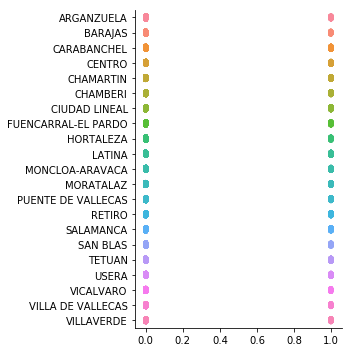

In [233]:
sb.catplot(data=visual_sample,kind="strip", orient="h"
          )

In [234]:
# Categorical distribution plots:

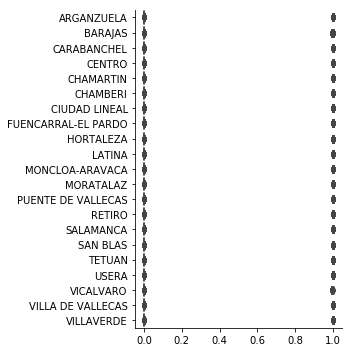

In [235]:
sb.catplot(data=visual_sample,kind="box", orient="h"
          )

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


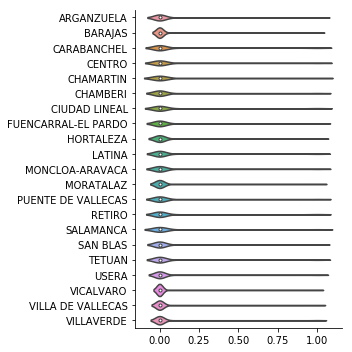

In [236]:
sb.catplot(data=visual_sample,kind="violin", orient="h"
          )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

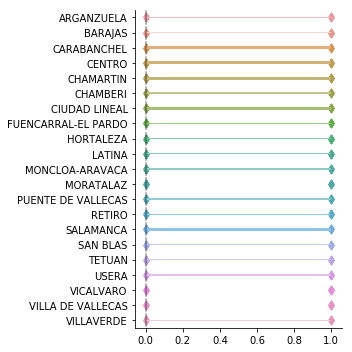

In [237]:
sb.catplot(data=visual_sample,kind="boxen", orient="h"
          )

In [238]:
# Categorical estimate plots:

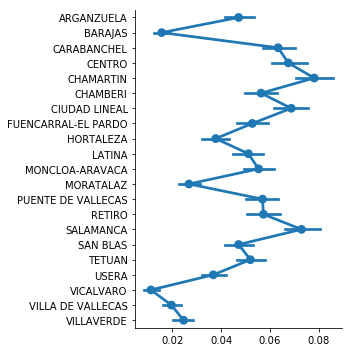

In [239]:
sb.catplot(data=visual_sample,kind="point", orient="h"
          )

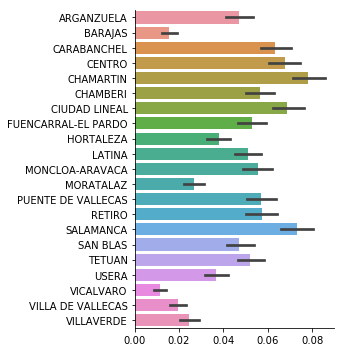

In [240]:
sb.catplot(data=visual_sample,kind="bar", orient="h"
          )

In [241]:
X_test.shape

(50600, 112)

In [242]:
visual_sample.columns

Index(['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN',
       'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA',
       'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS',
       'RETIRO', 'SALAMANCA', 'SAN BLAS', 'TETUAN', 'USERA', 'VICALVARO',
       'VILLA DE VALLECAS', 'VILLAVERDE'],
      dtype='object')

In [243]:
### CHIMPUM FINAL

In [244]:
!date

dom dic  1 22:45:59 CET 2019
